*No Goal*

. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . # # # . . . . 
. . . . . # . . . . 
. . . . . # . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . R . . . 


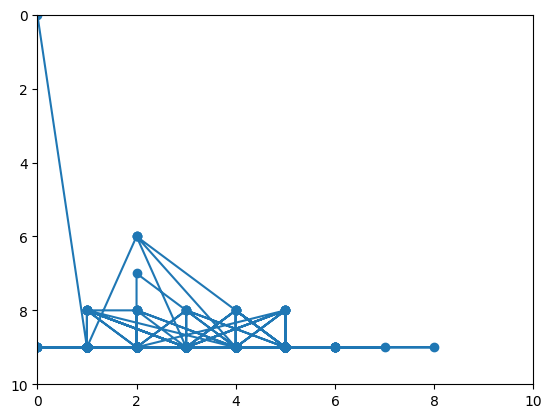

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

class RobotCar:
  def __init__(self, x=0, y=0, radius=1):
    self.x = x
    self.y = y
    self.radius = radius

  def move(self, dx, dy, env):
    new_x = self.x + dx
    new_y = self.y + dy

    if 0 <= new_x < env.width and 0 <= new_y < env.height:
      self.x = new_x
      self.y = new_y

  def position(self):
    return (self.x, self.y)

  def set_position(self, x, y):
    self.x = x
    self.y = y

  def set_radius(self, radius):
    self.radius = radius

  def get_radius(self):
    return self.radius

  def forward(self, distance):
    self.move(0, distance)

  def backward(self, distance):
    self.move(0, -distance)

  def turn_left(self, angle):
    # Assuming angle is in degrees
    self.x, self.y = self.y, -self.x

  def turn_right(self, angle):
    # Assuming angle is in degrees
    self.x, self.y = -self.y, self.x


class Environment:
  def __init__(self, width, height):
    self.width = width
    self.height = height
    self.obstacles = set()

  def add_obstacle(self, x, y):
    self.obstacles.add((x, y))

  def is_obstacle(self, x, y):
    return (x, y) in self.obstacles

  def display(self, robot_x, robot_y):
    for y in range(self.height):
      for x in range(self.width):
        if (x, y) == (robot_x, robot_y):
          print("R", end=" ")  # Robot
        elif self.is_obstacle(x, y):
          print("#", end=" ")  # Obstacle
        else:
          print(".", end=" ")  # Empty space
      print()


def q_learning(env, robot, num_episodes=1000, alpha=0.1, gamma=0.6, epsilon=0.1):
  """
  Implements Q-learning algorithm for robot navigation.

  Args:
      env: Environment object.
      robot: RobotCar object.
      num_episodes: Number of training episodes.
      alpha: Learning rate.
      gamma: Discount factor.
      epsilon: Exploration rate.

  Returns:
      The Q-table.
  """
  q_table = np.zeros((env.width, env.height, 4))  # Q-table: 4 actions (up, down, left, right)
  trajectory = []  # List to store robot positions during training

  for episode in range(num_episodes):
    state = (robot.x, robot.y)
    trajectory.append(state)
    step_count = 0  # Track steps for termination

    while True:
      step_count += 1

      # Choose an action (epsilon-greedy)
      if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Random action
      else:
        action = np.argmax(q_table[state[0], state[1]])

      # Take the action and observe the next state and reward
      if action == 0:  # Up
        robot.move(0, 1, env)
      elif action == 1:  # Down
        robot.move(0, -1, env)
      elif action == 2:  # Left
        robot.move(-1, 0, env)
      elif action == 3:  # Right
        robot.move(1, 0, env)

      next_state = (robot.x, robot.y)
      reward = -1 if env.is_obstacle(next_state[0], next_state[1]) else 0.1  # small reward for non-collisions
      q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])

      # Check for collision and handle
      if env.is_obstacle(robot.x, robot.y):
        robot.set_position(state[0], state[1])  # Move back to previous state
        # No need to update state as it's already set

      # Check for termination
      if step_count >= 50:  # Maximum steps reached
        break

      state = next_state

  return q_table,trajectory


# Create an environment
env = Environment(10, 10)

# Add obstacles to the environment
env.add_obstacle(3, 3)
env.add_obstacle(4, 3)
env.add_obstacle(5, 3)
env.add_obstacle(5, 4)
env.add_obstacle(5, 5)

# Create a robot car
car = RobotCar()

# Train the robot car using Q-learning
q_table, trajectory = q_learning(env, car)

# Display the environment with the final robot position
env.display(robot_x=car.x, robot_y=car.y)

# Plot the robot's path
trajectory_x = [x for x, y in trajectory]
trajectory_y = [y for x, y in trajectory]

plt.plot(trajectory_x, trajectory_y, marker='o')
plt.xlim(0, env.width)
plt.ylim(0, env.height)
plt.gca().invert_yaxis()
plt.show()



*Goal Given*

. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . # # # . . . . 
. . . . . # . . . . 
. # # . . # . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . # # . . R . 
. . . . . . . . # . 


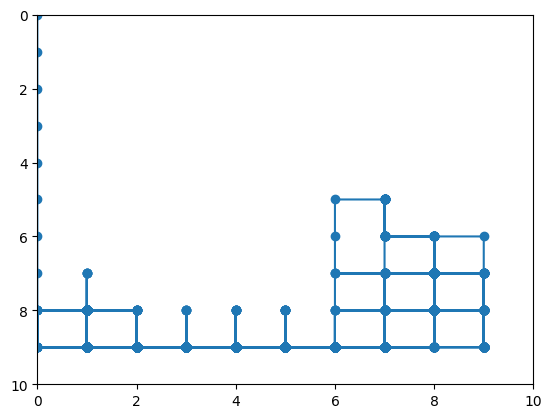

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

class RobotCar:
  def __init__(self, x=0, y=0, radius=1):
    self.x = x
    self.y = y
    self.radius = radius

  def move(self, dx, dy, env):
    new_x = self.x + dx
    new_y = self.y + dy

    if 0 <= new_x < env.width and 0 <= new_y < env.height:
      self.x = new_x
      self.y = new_y

  def position(self):
    return (self.x, self.y)

  def set_position(self, x, y):
    self.x = x
    self.y = y

  def set_radius(self, radius):
    self.radius = radius

  def get_radius(self):
    return self.radius

  def forward(self, distance):
    self.move(0, distance)

  def backward(self, distance):
    self.move(0, -distance)

  def turn_left(self, angle):
    # Assuming angle is in degrees
    self.x, self.y = self.y, -self.x

  def turn_right(self, angle):
    # Assuming angle is in degrees
    self.x, self.y = -self.y, self.x


class Environment:
  def __init__(self, width, height):
    self.width = width
    self.height = height
    self.obstacles = set()
    self.goal = (8, 8)  # Define the goal location

  def add_obstacle(self, x, y):
    self.obstacles.add((x, y))

  def is_obstacle(self, x, y):
    return (x, y) in self.obstacles

  def is_goal(self, x, y):
    return (x, y) == self.goal

  def display(self, robot_x, robot_y):
    for y in range(self.height):
      for x in range(self.width):
        if (x, y) == (robot_x, robot_y):
          print("R", end=" ")  # Robot
        elif self.is_obstacle(x, y):
          print("#", end=" ")  # Obstacle
        elif self.is_goal(x, y):
          print("G", end=" ")  # Goal
        else:
          print(".", end=" ")  # Empty space
      print()


def q_learning(env, robot, num_episodes=1000, alpha=0.1, gamma=0.6, epsilon=0.1):
  """
  Implements Q-learning algorithm for robot navigation with a goal.

  Args:
      env: Environment object.
      robot: RobotCar object.
      num_episodes: Number of training episodes.
      alpha: Learning rate.
      gamma: Discount factor.
      epsilon: Exploration rate.

  Returns:
      The Q-table.
  """
  q_table = np.zeros((env.width, env.height, 4))  # Q-table: 4 actions (up, down, left, right)
  trajectory = []  # List to store robot positions during training

  for episode in range(num_episodes):
    state = (robot.x, robot.y)
    trajectory.append(state)

    while True:
      # Choose an action (epsilon-greedy)
      if random.uniform(0, 1) < epsilon:
        action = random.randint(0, 3)  # Random action
      else:
        action = np.argmax(q_table[state[0], state[1]])

      # Take the action and observe the next state and reward
      if action == 0:  # Up
        robot.move(0, 1, env)
      elif action == 1:  # Down
        robot.move(0, -1, env)
      elif action == 2:  # Left
        robot.move(-1, 0, env)
      elif action == 3:  # Right
        robot.move(1, 0, env)
      trajectory.append((robot.x, robot.y))
      next_state = (robot.x, robot.y)
      reward = -1 if env.is_obstacle(next_state[0], next_state[1]) else 0.1  # small reward for non-collisions
      if env.is_goal(next_state[0], next_state[1]):  # High reward for reaching goal
        reward = 10

      # Update Q-table
      q_table[state[0], state[1], action] += alpha * (reward + gamma * np.max(q_table[next_state[0], next_state[1]]) - q_table[state[0], state[1], action])

      # Check for collision and handle
      if env.is_obstacle(robot.x, robot.y):
        robot.set_position(state[0], state[1])  # Move back to previous state
        # No need to update state as it's already set

      # Check for termination (reached goal or max steps)
      step_count = 0  # Initialize step_count within the loop
      if env.is_goal(robot.x, robot.y) or step_count >= 50:
        break

      step_count += 1  # Increment step_count within the loop
      state = next_state

  return q_table, trajectory


# Create an environment
env = Environment(10, 10)

# Add obstacles to the environment
env.add_obstacle(3, 3)
env.add_obstacle(4, 3)
env.add_obstacle(5, 3)
env.add_obstacle(5, 4)
env.add_obstacle(5, 5)
env.add_obstacle(2, 5)
env.add_obstacle(4, 8)
env.add_obstacle(8, 9)
env.add_obstacle(1, 5)
env.add_obstacle(5, 8)
env.add_obstacle(10, 5)
# Create a robot car
car = RobotCar()

# Train the robot car using Q-learning
q_table, trajectory = q_learning(env, car)

# Display the environment with the final robot position
env.display(robot_x=car.x, robot_y=car.y)

# Plot the robot's path
# Plot the robot's path
trajectory_x = [x for x, y in trajectory]
trajectory_y = [y for x, y in trajectory]

plt.plot(trajectory_x, trajectory_y, marker='o')
plt.xlim(0, env.width)
plt.ylim(0, env.height)
plt.gca().invert_yaxis()
plt.show()



*User Input*

In [3]:
# Create an environment with user-defined size
env_width = int(input("Enter the desired environment width: "))
env_height = int(input("Enter the desired environment height: "))
env = Environment(env_width, env_height)

# Get user input for obstacles (optional)
num_obstacles = int(input("Enter the number of obstacles to add: "))

for i in range(num_obstacles):
  print(f"Obstacle {i+1}:")
  x = int(input("Enter x-coordinate: "))
  y = int(input("Enter y-coordinate: "))
  env.add_obstacle(x, y)

# Get user input for car position
print("Car placement:")
car_x = int(input("Enter x-coordinate: "))
car_y = int(input("Enter y-coordinate: "))
car.set_position(car_x, car_y)


Enter the desired environment width: 10 
Enter the desired environment height: 10
Enter the number of obstacles to add: 1
Obstacle 1:
Enter x-coordinate: 3
Enter y-coordinate: 2
Car placement:
Enter x-coordinate: 1
Enter y-coordinate: 3


. . . . . . . . . . 
. . . . . . . . . . 
. . . # . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . R . 
. . . . . . . . . . 


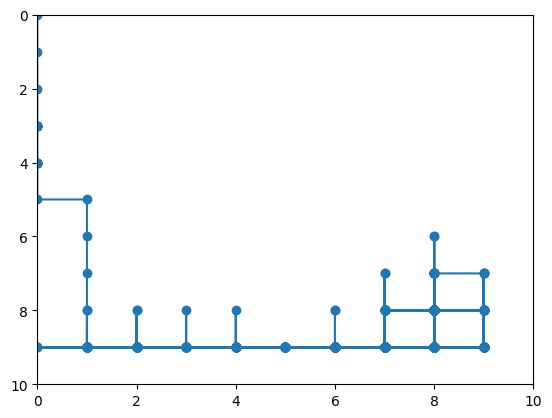

In [4]:
car = RobotCar()

# Train the robot car using Q-learning
q_table, trajectory = q_learning(env, car)

# Display the environment with the final robot position
env.display(robot_x=car.x, robot_y=car.y)

# Plot the robot's path
# Plot the robot's path
trajectory_x = [x for x, y in trajectory]
trajectory_y = [y for x, y in trajectory]

plt.plot(trajectory_x, trajectory_y, marker='o')
plt.xlim(0, env.width)
plt.ylim(0, env.height)
plt.gca().invert_yaxis()
plt.show()

In [5]:
!pip install torch torchvision torchaudio


*Deep Q Learning*

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random


class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class RobotCar:
    def __init__(self, x=0, y=0, radius=1):
        self.x = x
        self.y = y
        self.radius = radius

    def move(self, dx, dy, env):
        new_x = self.x + dx
        new_y = self.y + dy

        if 0 <= new_x < env.width and 0 <= new_y < env.height:
            self.x = new_x
            self.y = new_y

    def position(self):
        return (self.x, self.y)

    def set_position(self, x, y):
        self.x = x
        self.y = y

    def set_radius(self, radius):
        self.radius = radius

    def get_radius(self):
        return self.radius

    def forward(self, distance):
        self.move(0, distance)

    def backward(self, distance):
        self.move(0, -distance)

    def turn_left(self, angle):
        # Assuming angle is in degrees
        self.x, self.y = self.y, -self.x

    def turn_right(self, angle):
        # Assuming angle is in degrees
        self.x, self.y = -self.y, self.x


class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.obstacles = set()
        self.goal = (8, 8)  # Define the goal location

    def add_obstacle(self, x, y):
        self.obstacles.add((x, y))

    def is_obstacle(self, x, y):
        return (x, y) in self.obstacles

    def is_goal(self, x, y):
        return (x, y) == self.goal

    def display(self, robot_x, robot_y):
        for y in range(self.height):
            for x in range(self.width):
                if (x, y) == (robot_x, robot_y):
                    print("R", end=" ")  # Robot
                elif self.is_obstacle(x, y):
                    print("#", end=" ")  # Obstacle
                elif self.is_goal(x, y):
                    print("G", end=" ")  # Goal
                else:
                    print(".", end=" ")  # Empty space
            print()


def q_learning(env, robot, num_episodes=1000, alpha=0.1, gamma=0.6, epsilon=0.1):
    """
    Implements DQN for robot navigation with a goal.

    Args:
        env: Environment object.
        robot: RobotCar object.
        num_episodes: Number of training episodes.
        alpha: Learning rate.
        gamma: Discount factor.
        epsilon: Exploration rate.

    Returns:
        The DQN model.
    """
    input_dim = 2  # (x, y) coordinates
    output_dim = 4  # 4 actions (up, down, left, right)

    model = DQN(input_dim, output_dim)
    optimizer = optim.Adam(model.parameters(), lr=alpha)
    criterion = nn.MSELoss()

    for episode in range(num_episodes):
        state = torch.tensor([robot.x, robot.y], dtype=torch.float32)
        trajectory = [state.tolist()]

        while True:
            # Choose an action (epsilon-greedy)
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, output_dim - 1)  # Random action
            else:
                q_values = model(state)
                action = torch.argmax(q_values).item()

            # Take the action and observe the next state and reward
            if action == 0:  # Up
                robot.move(0, 1, env)
            elif action == 1:  # Down
                robot.move(0, -1, env)
            elif action == 2:  # Left
                robot.move(-1, 0, env)
            elif action == 3:  # Right
                robot.move(1, 0, env)

            next_state = torch.tensor([robot.x, robot.y], dtype=torch.float32)
            reward = -1 if env.is_obstacle(robot.x, robot.y) else 0.1  # small reward for non-collisions
            if env.is_goal(robot.x, robot.y):  # High reward for reaching goal
                reward = 10

            # Update Q-values using the DQN
            q_values_next = model(next_state)
            q_value_next_max = torch.max(q_values_next)
            q_value_target = reward + gamma * q_value_next_max
            q_value_predicted = model(state)[action]

            loss = criterion(q_value_predicted, q_value_target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Check for collision and handle
            if env.is_obstacle(robot.x, robot.y):
                robot.set_position(trajectory[-1][0], trajectory[-1][1])  # Move back to previous state

            # Check for termination (reached goal or max steps)
            if env.is_goal(robot.x, robot.y):
                break

            if len(trajectory) >= 50:  # Maximum steps reached
                break

            trajectory.append(next_state.tolist())
            state = next_state

    return model


# Create an environment
env = Environment(10, 10)

# Add obstacles to the environment
env.add_obstacle(3, 3)
env.add_obstacle(4, 3)
env.add_obstacle(5, 3)
env.add_obstacle(5, 4)
env.add_obstacle(5, 5)
env.add_obstacle(2, 5)
env.add_obstacle(4, 8)
env.add_obstacle(8, 9)
env.add_obstacle(1, 5)
env.add_obstacle(5, 8)
env.add_obstacle(10, 5)

# Create a robot car
car = RobotCar()

# Train the robot car using DQN
model = q_learning(env, car)

# Display the environment with the final robot position
env.display(robot_x=car.x, robot_y=car.y)


. . . . . . . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . # # # . . . . 
. . . . . # . . . . 
. # # . . # . . . . 
. . . . . . . . . . 
. . . . . . . . . . 
. . . . # # . . R . 
. . . . . . . . # . 


* * * * * * * * * R 
* * * . . * * * * * 
* * . . . . . . * * 
* * . # # # . . . * 
* * . . . # . . . * 
* # # . . # . . . * 
* . . . . . . . . * 
* . . . . . . . . * 
* . . . # # . . G * 
* . . . . . . . # * 


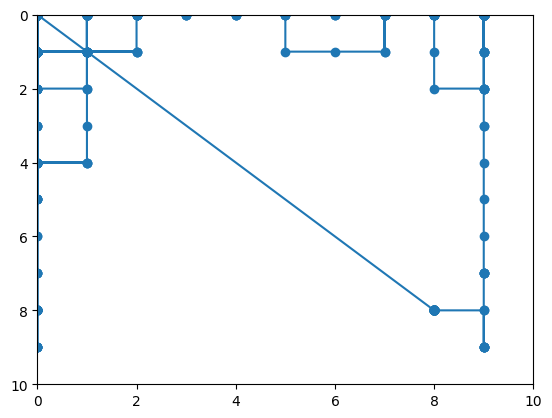

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random


class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class RobotCar:
    def __init__(self, x=0, y=0, radius=1):
        self.x = x
        self.y = y
        self.radius = radius

    def move(self, dx, dy, env):
        new_x = self.x + dx
        new_y = self.y + dy

        if 0 <= new_x < env.width and 0 <= new_y < env.height:
            self.x = new_x
            self.y = new_y

    def position(self):
        return (self.x, self.y)

    def set_position(self, x, y):
        self.x = x
        self.y = y

    def set_radius(self, radius):
        self.radius = radius

    def get_radius(self):
        return self.radius

    def forward(self, distance):
        self.move(0, distance)

    def backward(self, distance):
        self.move(0, -distance)

    def turn_left(self, angle):
        # Assuming angle is in degrees
        self.x, self.y = self.y, -self.x

    def turn_right(self, angle):
        # Assuming angle is in degrees
        self.x, self.y = -self.y, self.x


class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.obstacles = set()
        self.goal = (8, 8)  # Define the goal location

    def add_obstacle(self, x, y):
        self.obstacles.add((x, y))

    def is_obstacle(self, x, y):
        return (x, y) in self.obstacles

    def is_goal(self, x, y):
        return (x, y) == self.goal

    def display(self, robot_x, robot_y, trajectory):
        for y in range(self.height):
            for x in range(self.width):
                if (x, y) == (robot_x, robot_y):
                    print("R", end=" ")  # Robot
                elif self.is_obstacle(x, y):
                    print("#", end=" ")  # Obstacle
                elif self.is_goal(x, y):
                    print("G", end=" ")  # Goal
                elif (x, y) in trajectory:
                    print("*", end=" ")  # Path of the car
                else:
                    print(".", end=" ")  # Empty space
            print()


def q_learning(env, robot, num_episodes=1000, alpha=0.1, gamma=0.6, epsilon=0.1):
    """
    Implements DQN for robot navigation with a goal.

    Args:
        env: Environment object.
        robot: RobotCar object.
        num_episodes: Number of training episodes.
        alpha: Learning rate.
        gamma: Discount factor.
        epsilon: Exploration rate.

    Returns:
        The DQN model and trajectory.
    """
    input_dim = 2  # (x, y) coordinates
    output_dim = 4  # 4 actions (up, down, left, right)

    model = DQN(input_dim, output_dim)
    optimizer = optim.Adam(model.parameters(), lr=alpha)
    criterion = nn.MSELoss()

    trajectory = []

    for episode in range(num_episodes):
        state = torch.tensor([robot.x, robot.y], dtype=torch.float32)
        trajectory.append((robot.x, robot.y))

        while True:
            # Choose an action (epsilon-greedy)
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, output_dim - 1)  # Random action
            else:
                q_values = model(state)
                action = torch.argmax(q_values).item()

            # Take the action and observe the next state and reward
            if action == 0:  # Up
                robot.move(0, 1, env)
            elif action == 1:  # Down
                robot.move(0, -1, env)
            elif action == 2:  # Left
                robot.move(-1, 0, env)
            elif action == 3:  # Right
                robot.move(1, 0, env)

            next_state = torch.tensor([robot.x, robot.y], dtype=torch.float32)
            reward = -1 if env.is_obstacle(robot.x, robot.y) else 0.1  # small reward for non-collisions
            if env.is_goal(robot.x, robot.y):  # High reward for reaching goal
                reward = 10

            # Update Q-values using the DQN
            q_values_next = model(next_state)
            q_value_next_max = torch.max(q_values_next)
            q_value_target = reward + gamma * q_value_next_max
            q_value_predicted = model(state)[action]

            loss = criterion(q_value_predicted, q_value_target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Check for collision and handle
            if env.is_obstacle(robot.x, robot.y):
                robot.set_position(trajectory[-1][0], trajectory[-1][1])  # Move back to previous state

            # Check for termination (reached goal or max steps)
            if env.is_goal(robot.x, robot.y):
                trajectory.append((robot.x, robot.y))
                break

            if len(trajectory) >= 50:  # Maximum steps reached
                break

            state = next_state

    return model, trajectory


# Create an environment
env = Environment(10, 10)

# Add obstacles to the environment
env.add_obstacle(3, 3)
env.add_obstacle(4, 3)
env.add_obstacle(5, 3)
env.add_obstacle(5, 4)
env.add_obstacle(5, 5)
env.add_obstacle(2, 5)
env.add_obstacle(4, 8)
env.add_obstacle(8, 9)
env.add_obstacle(1, 5)
env.add_obstacle(5, 8)
env.add_obstacle(10, 5)

# Create a robot car
car = RobotCar()

# Train the robot car using DQN
model, trajectory = q_learning(env, car)

# Display the environment with the final robot position and the path of the car
env.display(robot_x=car.x, robot_y=car.y, trajectory=trajectory)

# Plot the path of the car
trajectory_x = [x for x, y in trajectory]
trajectory_y = [y for x, y in trajectory]

plt.plot(trajectory_x, trajectory_y, marker='o')
plt.xlim(0, env.width)
plt.ylim(0, env.height)
plt.gca().invert_yaxis()
plt.show()


*Optimal Path with Deep Q Learning*

* * * * * * * * * * 
* * * * * * * * * * 
* . . . * . * . * * 
* . . # # # * . * * 
* . . . . # * . * * 
* # # . . # * * * * 
* * * * * * * * * * 
* * * * * * * * * * 
* . . . # # . . G R 
* * . . . . . . # * 


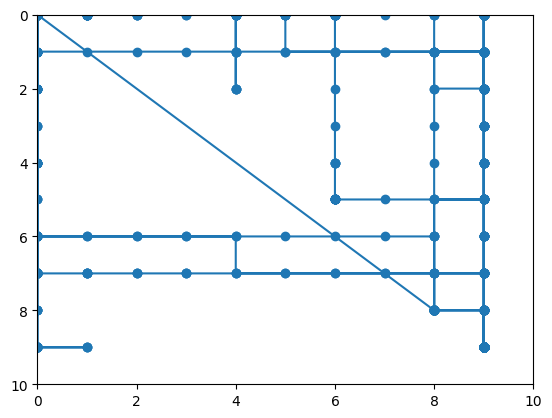

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import random


class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class RobotCar:
    def __init__(self, x=0, y=0, radius=1):
        self.x = x
        self.y = y
        self.radius = radius

    def move(self, dx, dy, env):
        new_x = self.x + dx
        new_y = self.y + dy

        if 0 <= new_x < env.width and 0 <= new_y < env.height:
            self.x = new_x
            self.y = new_y

    def position(self):
        return (self.x, self.y)

    def set_position(self, x, y):
        self.x = x
        self.y = y

    def set_radius(self, radius):
        self.radius = radius

    def get_radius(self):
        return self.radius

    def forward(self, distance):
        self.move(0, distance)

    def backward(self, distance):
        self.move(0, -distance)

    def turn_left(self, angle):
        # Assuming angle is in degrees
        self.x, self.y = self.y, -self.x

    def turn_right(self, angle):
        # Assuming angle is in degrees
        self.x, self.y = -self.y, self.x


class Environment:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.obstacles = set()
        self.goal = (8, 8)  # Define the goal location

    def add_obstacle(self, x, y):
        self.obstacles.add((x, y))

    def is_obstacle(self, x, y):
        return (x, y) in self.obstacles

    def is_goal(self, x, y):
        return (x, y) == self.goal

    def display(self, robot_x, robot_y, trajectory):
        for y in range(self.height):
            for x in range(self.width):
                if (x, y) == (robot_x, robot_y):
                    print("R", end=" ")  # Robot
                elif self.is_obstacle(x, y):
                    print("#", end=" ")  # Obstacle
                elif self.is_goal(x, y):
                    print("G", end=" ")  # Goal
                elif (x, y) in trajectory:
                    print("*", end=" ")  # Optimal path
                else:
                    print(".", end=" ")  # Empty space
            print()


def q_learning(env, robot, num_episodes=1000, alpha=0.1, gamma=0.6, epsilon=0.1):
    """
    Implements DQN for robot navigation with a goal.

    Args:
        env: Environment object.
        robot: RobotCar object.
        num_episodes: Number of training episodes.
        alpha: Learning rate.
        gamma: Discount factor.
        epsilon: Exploration rate.

    Returns:
        The DQN model and the optimal path.
    """
    input_dim = 2  # (x, y) coordinates
    output_dim = 4  # 4 actions (up, down, left, right)

    model = DQN(input_dim, output_dim)
    optimizer = optim.Adam(model.parameters(), lr=alpha)
    criterion = nn.MSELoss()

    trajectory = []

    for episode in range(num_episodes):
        state = torch.tensor([robot.x, robot.y], dtype=torch.float32)
        trajectory.append((robot.x, robot.y))

        while True:
            # Choose an action (epsilon-greedy)
            if random.uniform(0, 1) < epsilon:
                action = random.randint(0, output_dim - 1)  # Random action
            else:
                q_values = model(state)
                action = torch.argmax(q_values).item()

            # Take the action and observe the next state and reward
            if action == 0:  # Up
                robot.move(0, 1, env)
            elif action == 1:  # Down
                robot.move(0, -1, env)
            elif action == 2:  # Left
                robot.move(-1, 0, env)
            elif action == 3:  # Right
                robot.move(1, 0, env)

            next_state = torch.tensor([robot.x, robot.y], dtype=torch.float32)
            reward = -1 if env.is_obstacle(robot.x, robot.y) else 0.1  # small reward for non-collisions
            if env.is_goal(robot.x, robot.y):  # High reward for reaching goal
                reward = 10

            # Update Q-values using the DQN
            q_values_next = model(next_state)
            q_value_next_max = torch.max(q_values_next)
            q_value_target = reward + gamma * q_value_next_max
            q_value_predicted = model(state)[action]

            loss = criterion(q_value_predicted, q_value_target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Check for collision and handle
            if env.is_obstacle(robot.x, robot.y):
                robot.set_position(trajectory[-1][0], trajectory[-1][1])  # Move back to previous state

            # Check for termination (reached goal or max steps)
            if env.is_goal(robot.x, robot.y):
                trajectory.append((robot.x, robot.y))
                break

            if len(trajectory) >= 50:  # Maximum steps reached
                break

            state = next_state

    return model, trajectory


# Create an environment
env = Environment(10, 10)

# Add obstacles to the environment
env.add_obstacle(3, 3)
env.add_obstacle(4, 3)
env.add_obstacle(5, 3)
env.add_obstacle(5, 4)
env.add_obstacle(5, 5)
env.add_obstacle(2, 5)
env.add_obstacle(4, 8)
env.add_obstacle(8, 9)
env.add_obstacle(1, 5)
env.add_obstacle(5, 8)
env.add_obstacle(10, 5)

# Create a robot car
car = RobotCar()

# Train the robot car using DQN
model, trajectory = q_learning(env, car)

# Display the environment with the final robot position and the optimal path
env.display(robot_x=car.x, robot_y=car.y, trajectory=trajectory)

# Plot the optimal path
trajectory_x = [x for x, y in trajectory]
trajectory_y = [y for x, y in trajectory]

plt.plot(trajectory_x, trajectory_y, marker='o')
plt.xlim(0, env.width)
plt.ylim(0, env.height)
plt.gca().invert_yaxis()
plt.show()
